# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [16]:
# read the iris data into a pandas DataFrame, including column names
df=pd.read_csv('iris.csv')


array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Task 2

In [17]:
# gather basic information
df.info()
df.describe()
df.isnull().sum()
df.head()
df.sample(10)
df['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Task 3

In [45]:
# use groupby to look for differences between the species
df1=df.groupby('species').mean()
df1.reset_index(inplace=True)

In [46]:
df1.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.418,1.464,0.244
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [28]:
# use sorting to look for differences between the species
df.sort_values('sepal_width')

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor
62,6.0,2.2,4.0,1.0,versicolor
119,6.0,2.2,5.0,1.5,virginica
68,6.2,2.2,4.5,1.5,versicolor
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,setosa
14,5.8,4.0,1.2,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [29]:
df.sort_values('sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica


In [30]:
df.sort_values('petal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,virginica
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica


In [31]:
df.sort_values('petal_width')

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
9,4.9,3.1,1.5,0.1,setosa
12,4.8,3.0,1.4,0.1,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
114,5.8,2.8,5.1,2.4,virginica
100,6.3,3.3,6.0,2.5,virginica
144,6.7,3.3,5.7,2.5,virginica


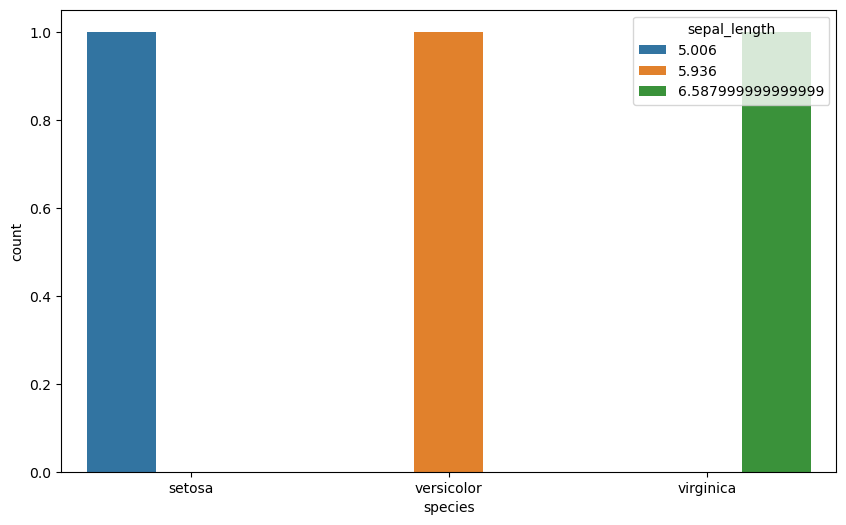

In [52]:
# use plotting to look for differences between the species
import seaborn as sns
plt.figure(figsize=(10,6))

sns.countplot(x=df1['species'],hue=df1['sepal_length']);

(array([[1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 2.],
        [0., 0., 0., 0., 2., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
        [1., 0., 1., 1., 0., 0., 0., 0., 0., 0.]]),
 array([0.0, 0.6587999999999999, 1.3175999999999999, 1.9764,
        2.6351999999999998, 3.2939999999999996, 3.9528, 4.611599999999999,
        5.2703999999999995, 5.9292, 6.587999999999999], dtype=object),
 <a list of 5 BarContainer objects>)

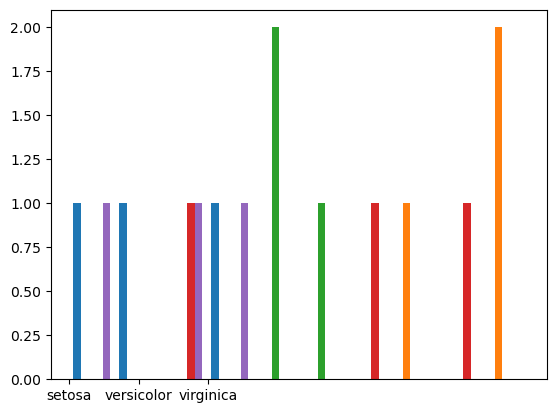

In [48]:
plt.hist(df1)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

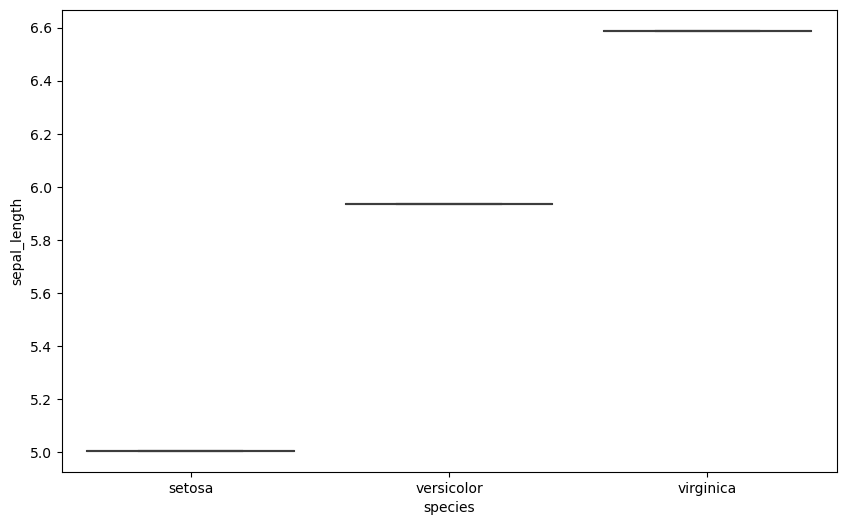

In [57]:
# map species to a numeric value so that plots can be colored by category
plt.figure(figsize=(10,6))
sns.boxplot(x='species',y='sepal_length',data=df1)

## Task 4

## Bonus

In [ ]:
# define function that accepts a row of data and returns a predicted species
